In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack

In [3]:
def get_data(problem, noise, dt, timeseries_length):
    r = pynumdiff.utils.simulate.__dict__[problem](timeseries_length, noise_parameters=[0, noise], dt=dt)
    x, x_truth, dxdt_truth, _ = r
    t = np.linspace(0, timeseries_length, len(x))
    #dt = np.mean(np.diff(t))
    return x, x_truth, dxdt_truth, t, dt

In [9]:
def get_gamma(dt, freq):
    try:
        g = np.min([1, np.exp(np.log10(freq)*(-4)-1)])
        return g
    except:
        g = [np.min([1, np.exp(np.log10(f)*(-4)-1)]) for f in freq]
        return g

Text(0,0.5,'x')

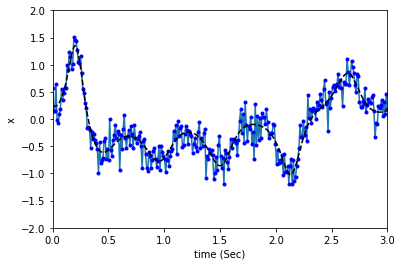

In [41]:
def run_analysis(x, x_truth, dxdt_truth, dt, freq, gamma=None):
    t = np.arange(0, dt*len(x), dt)
    
    if gamma is None:
        gamma = get_gamma(dt, freq)
    
    method_parent = 'linear_model'
    method = 'savgoldiff'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
    x_smooth, xdot_smooth_savgoldiff  = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

    method_parent = 'smooth_finite_difference'
    method = 'butterdiff'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
    x_smooth, xdot_smooth_butterdiff = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

    if 0:
        method_parent = 'kalman_smooth'
        method = 'constant_acceleration'
        params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
        x_smooth, xdot_smooth_kalman = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
        
        return xdot_smooth_savgoldiff, xdot_smooth_butterdiff, xdot_smooth_kalman
    
    return xdot_smooth_savgoldiff, xdot_smooth_butterdiff

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [70]:
dt = 0.01
noise = 0.01
timeseries_length = 4
problem = 'lorenz_x'
x, x_truth, dxdt_truth, t, dt = get_data(problem, noise, dt, timeseries_length)

In [71]:
derivative_estimates = []
for freq in [1, 2, 3, 4]:
    n = run_analysis(x, x_truth, dxdt_truth, dt, freq)
    derivative_estimates.extend(n)
derivative_estimates = np.array(derivative_estimates)
derivative_estimates = np.sort(derivative_estimates, axis=0)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

Text(0,0.5,'velocity')

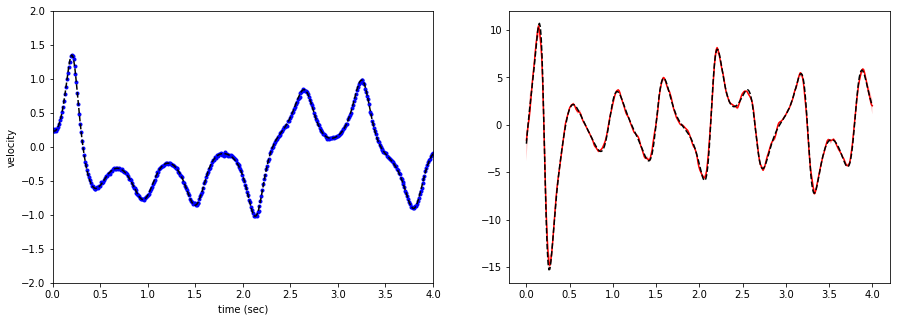

In [75]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(t, x, '.', color='blue')
ax1.plot(t, x_truth, '--', color='black')
ax1.set_xlim(0, 4)
ax1.set_ylim(-2,2)
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('position')

ax2 = fig.add_subplot(122)

h = int(0.9*derivative_estimates.shape[0])
l = int(0.1*derivative_estimates.shape[0])
m = int(0.5*derivative_estimates.shape[0])

ax2.fill_between(t, derivative_estimates[l,:], derivative_estimates[h,:], alpha=0.3, facecolor='red')
ax2.plot(t, derivative_estimates[m,:], color='red')
ax2.plot(t, dxdt_truth, '--', color='black')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('velocity')

In [76]:
dt = 0.001
noise = 0.1
timeseries_length = 4
problem = 'lorenz_x'
x, x_truth, dxdt_truth, t, dt = get_data(problem, noise, dt, timeseries_length)

In [77]:
derivative_estimates = []
for freq in [1, 2, 3, 4]:
    n = run_analysis(x, x_truth, dxdt_truth, dt, freq)
    derivative_estimates.extend(n)
derivative_estimates = np.array(derivative_estimates)
derivative_estimates = np.sort(derivative_estimates, axis=0)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

KeyboardInterrupt: 

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, 

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 9

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(t, x, '.', color='blue')
ax1.plot(t, x_truth, '--', color='black')
ax1.set_xlim(0, 4)
ax1.set_ylim(-2,2)
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('position')

ax2 = fig.add_subplot(122)

h = int(0.9*derivative_estimates.shape[0])
l = int(0.1*derivative_estimates.shape[0])
m = int(0.5*derivative_estimates.shape[0])

ax2.fill_between(t, derivative_estimates[l,:], derivative_estimates[h,:], alpha=0.3, facecolor='red')
ax2.plot(t, derivative_estimates[m,:], color='red')
ax2.plot(t, dxdt_truth, '--', color='black')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('velocity')

In [ ]:
dt = 0.001
noise = 0.4
timeseries_length = 4
problem = 'lorenz_x'
x, x_truth, dxdt_truth, t, dt = get_data(problem, noise, dt, timeseries_length)

In [ ]:
derivative_estimates = []
for freq in [1, 2, 3, 4]:
    n = run_analysis(x, x_truth, dxdt_truth, dt, freq)
    derivative_estimates.extend(n)
derivative_estimates = np.array(derivative_estimates)
derivative_estimates = np.sort(derivative_estimates, axis=0)

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(t, x, '.', color='blue')
ax1.plot(t, x_truth, '--', color='black')
ax1.set_xlim(0, 4)
ax1.set_ylim(-2,2)
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('position')

ax2 = fig.add_subplot(122)

h = int(0.9*derivative_estimates.shape[0])
l = int(0.1*derivative_estimates.shape[0])
m = int(0.5*derivative_estimates.shape[0])

ax2.fill_between(t, derivative_estimates[l,:], derivative_estimates[h,:], alpha=0.3, facecolor='red')
ax2.plot(t, derivative_estimates[m,:], color='red')
ax2.plot(t, dxdt_truth, '--', color='black')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('velocity')

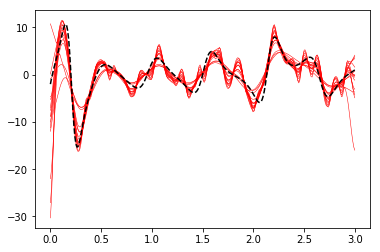

In [47]:
for r in range(derivative_estimates.shape[0]):
    plt.plot(t, derivative_estimates[r,:], color='red', linewidth=0.5)
plt.plot(t, dxdt_truth, '--', color='black')

Text(0,0.5,'x')

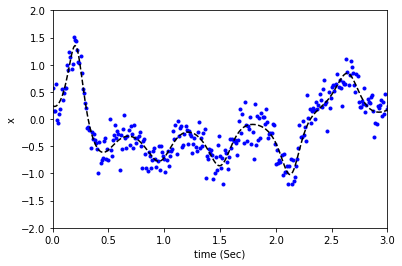

In [52]:
dt = 0.01
noise = 0.2
timeseries_length = 10
problem = 'lorenz_x'

x, x_truth, dxdt_truth, t, dt = get_data(problem, noise, dt, timeseries_length)

plt.plot(t, x, '.', color='blue')
plt.plot(t, x_truth, '--', color='black')
plt.xlim(0, 3)
plt.ylim(-2,2)
plt.xlabel('time (Sec)')
plt.ylabel('x')

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


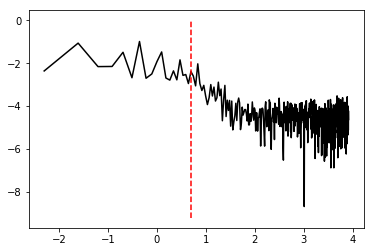

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

yf = scipy.fftpack.fft(x)
N = len(t)
xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)

P = np.log(2.0/N * np.abs(yf[:N//2]))
ax.plot(np.log(xf), P, color='black', zorder=-10)
#ax.vlines(np.log(0.005), np.log(1e-4), np.log(1), linestyle='--', color='red')
ax.vlines(np.log(2), np.log(1e-4), np.log(1), linestyle='--', color='red')

frequencies = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2])
power = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0])

#ax.set_ylim(1e-4, 1)


In [66]:
gamma = get_gamma(dt, 3)

method_parent = 'kalman_smooth'
method = 'constant_acceleration'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
x_smooth, xdot_smooth_savgoldiff  = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

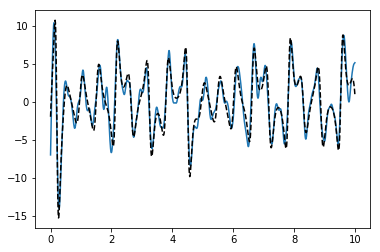

In [67]:
plt.plot(t, xdot_smooth_savgoldiff)
plt.plot(t, dxdt_truth, '--', color='black')